<a href="https://colab.research.google.com/github/pragatipatel26/Image-Processing/blob/main/Pragati_Patel_230765_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

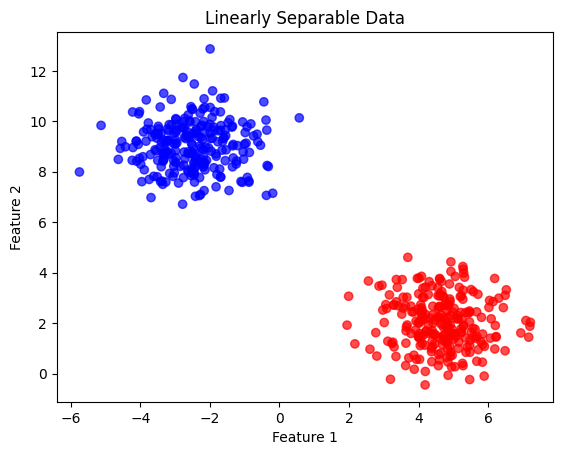

Epoch 0: cross_entropy Loss = 0.0922
Epoch 100: cross_entropy Loss = 0.0081
Epoch 200: cross_entropy Loss = 0.0046
Epoch 300: cross_entropy Loss = 0.0033
Epoch 400: cross_entropy Loss = 0.0026
Epoch 500: cross_entropy Loss = 0.0022
Epoch 600: cross_entropy Loss = 0.0019
Epoch 700: cross_entropy Loss = 0.0016
Epoch 800: cross_entropy Loss = 0.0015
Epoch 900: cross_entropy Loss = 0.0013
Epoch 0: mse Loss = 0.6880
Epoch 100: mse Loss = 0.0004
Epoch 200: mse Loss = 0.0002
Epoch 300: mse Loss = 0.0001
Epoch 400: mse Loss = 0.0001
Epoch 500: mse Loss = 0.0001
Epoch 600: mse Loss = 0.0001
Epoch 700: mse Loss = 0.0001
Epoch 800: mse Loss = 0.0000
Epoch 900: mse Loss = 0.0000


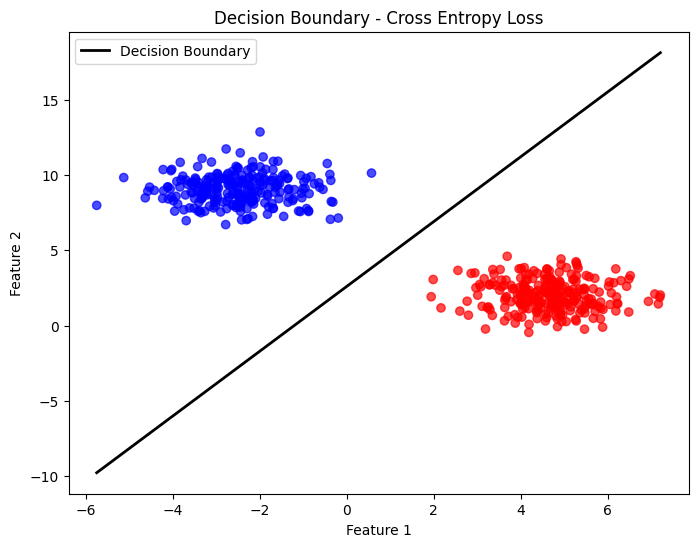

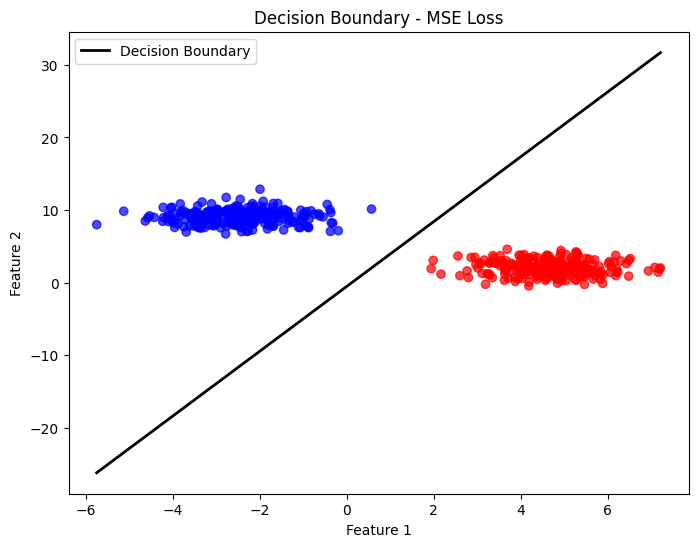

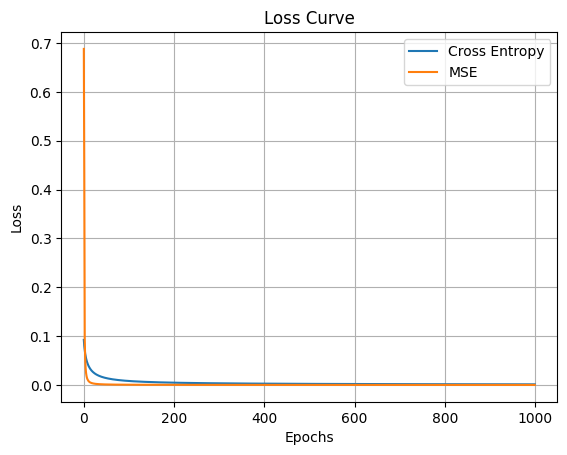

Accuracy with Cross Entropy: 1.0
Accuracy with MSE: 1.0


In [ ]:
##part1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate Linearly Separable Data
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=42)
y = y.reshape(500, 1)  # Ensure y is column vector

# Visualize Data
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', alpha=0.7)
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Prediction Function
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

# Step 4: Loss Functions
#mse_loss
def mse_loss(X, y, weights):
    predictions = predict(X, weights)
    return np.mean((predictions - y) ** 2)
#binary cross entropy loss
def cross_entropy_loss(X, y, weights):
    predictions = predict(X, weights)
    epsilon = 1e-10  # Avoid log(0)
    return -np.mean(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))

# Step 5: Update Function (Gradient Descent)
def update(X, y, weights, learning_rate, loss_type='cross_entropy'):
    predictions = predict(X, weights)
    error = predictions - y
    gradient = np.dot(X.T, error) / len(y)
    weights -= learning_rate * gradient
    return weights

#Step 6:Training function
def train(X, y, learning_rate=0.1, maxEpochs=1000, loss_type='cross_entropy'):
    # Add bias term
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    weights = np.random.randn(X_b.shape[1], 1)
    loss_history = []

    for epoch in range(maxEpochs):
        weights = update(X_b, y, weights, learning_rate, loss_type)

        # Compute loss
        if loss_type == 'cross_entropy':
            loss = cross_entropy_loss(X_b, y, weights)
        else:
            loss = mse_loss(X_b, y, weights)

        loss_history.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: {loss_type} Loss = {loss:.4f}")

    return weights, loss_history





# Train using Cross Entropy
weights_ce, history_ce = train(X, y, learning_rate=0.1, maxEpochs=1000, loss_type='cross_entropy')

# Train using MSE
weights_mse, history_mse = train(X, y, learning_rate=0.1, maxEpochs=1000, loss_type='mse')



# Step 7: Visualization of Decision Boundary
def plot_decision_boundary(X, y, weights, title="Decision Boundary"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', alpha=0.7)

    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
   ## x2 = -(weights[0] + weights[1] * x1) / weights[2]
    x2 = -(weights[0][0] + weights[1][0] * x1) / weights[2][0]

    plt.plot(x1, x2, color='black', linewidth=2, label='Decision Boundary')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


# Plotting the decision boundary
plot_decision_boundary(X, y, weights_ce, title="Decision Boundary - Cross Entropy Loss")
plot_decision_boundary(X, y, weights_mse, title="Decision Boundary - MSE Loss")
plt.plot(history_ce, label="Cross Entropy")
plt.plot(history_mse, label="MSE")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

def accuracy(X, y, weights):
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    predictions = predict(X_b, weights)
    predicted_labels = (predictions >= 0.5).astype(int)
    return np.mean(predicted_labels == y)


print("Accuracy with Cross Entropy:", accuracy(X, y, weights_ce))
print("Accuracy with MSE:", accuracy(X, y, weights_mse))




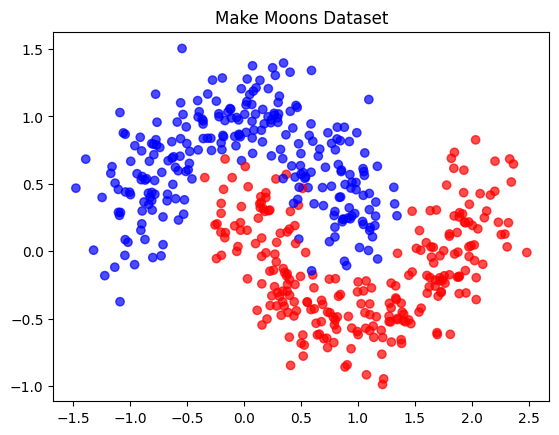

Epoch 0: Loss = 0.7564, Accuracy = 30.00%
Epoch 100: Loss = 0.6651, Accuracy = 81.80%
Epoch 200: Loss = 0.5870, Accuracy = 81.60%
Epoch 300: Loss = 0.5002, Accuracy = 82.00%
Epoch 400: Loss = 0.4305, Accuracy = 82.20%
Epoch 500: Loss = 0.3859, Accuracy = 83.00%
Epoch 600: Loss = 0.3575, Accuracy = 84.20%
Epoch 700: Loss = 0.3386, Accuracy = 84.60%
Epoch 800: Loss = 0.3259, Accuracy = 85.40%
Epoch 900: Loss = 0.3174, Accuracy = 85.60%


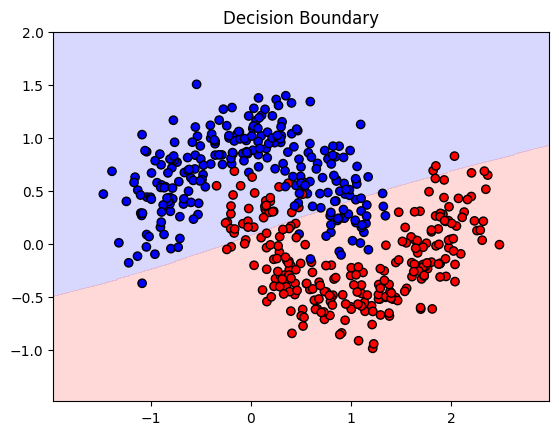

Final Accuracy: 85.60%


In [ ]:
##part2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
np.random.seed(42)

# 1. Load Data
X, y = make_moons(n_samples=500, noise=0.2)
y = y.reshape(500, 1)
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', alpha=0.7)
plt.title("Make Moons Dataset")
plt.show()

# 2. Sigmoid & Derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# 3. Initialize Network
input_size = 2
hidden_size1 = 8
hidden_size2 = 4
output_size = 1

# Xavier initialization
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size1))

W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
b2 = np.zeros((1, hidden_size2))

W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
b3 = np.zeros((1, output_size))

# 4. Forward Propagation
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)

    return z1, a1, z2, a2, z3, a3

# 5. Binary Cross Entropy Loss
def compute_loss(y, y_hat):
    epsilon = 1e-10
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

# 6. Backward Propagation
def backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate):
    global W1, b1, W2, b2, W3, b3

    m = len(y)
    dz3 = a3 - y
    dW3 = np.dot(a2.T, dz3) / m
    db3 = np.sum(dz3, axis=0, keepdims=True) / m

    dz2 = np.dot(dz3, W3.T) * sigmoid_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    # Update weights and biases
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# 7. Training
def train(X, y, epochs=1000, learning_rate=0.1):
    for epoch in range(epochs):
        z1, a1, z2, a2, z3, a3 = forward(X)
        loss = compute_loss(y, a3)
        backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate)

        if epoch % 100 == 0:
            preds = (a3 > 0.5).astype(int)
            acc = accuracy_score(y, preds)
            print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc*100:.2f}%")

# Start training
train(X, y, epochs=1000, learning_rate=0.1)

# 8. Plot Decision Boundary
def plot_decision_boundary(X, y, predict_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z_input = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, _, _, Z_prob = forward(Z_input)
    Z = Z_prob > 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, forward)

# After training
z1, a1, z2, a2, z3, a3 = forward(X)
final_preds = (a3 > 0.5).astype(int)
final_acc = accuracy_score(y, final_preds)
print(f"Final Accuracy: {final_acc * 100:.2f}%")



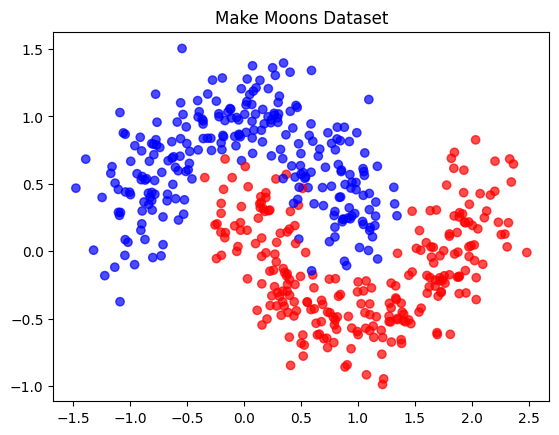

[ReLU] Epoch 0: Loss = 0.6949, Accuracy = 35.20%
[ReLU] Epoch 100: Loss = 0.4445, Accuracy = 86.00%
[ReLU] Epoch 200: Loss = 0.3233, Accuracy = 85.20%
[ReLU] Epoch 300: Loss = 0.2886, Accuracy = 86.40%
[ReLU] Epoch 400: Loss = 0.2737, Accuracy = 86.80%
[ReLU] Epoch 500: Loss = 0.2651, Accuracy = 87.00%
[ReLU] Epoch 600: Loss = 0.2583, Accuracy = 87.20%
[ReLU] Epoch 700: Loss = 0.2497, Accuracy = 87.40%
[ReLU] Epoch 800: Loss = 0.2413, Accuracy = 87.80%
[ReLU] Epoch 900: Loss = 0.2312, Accuracy = 88.80%

✅ Final Accuracy after 1000 epochs: 91.20%


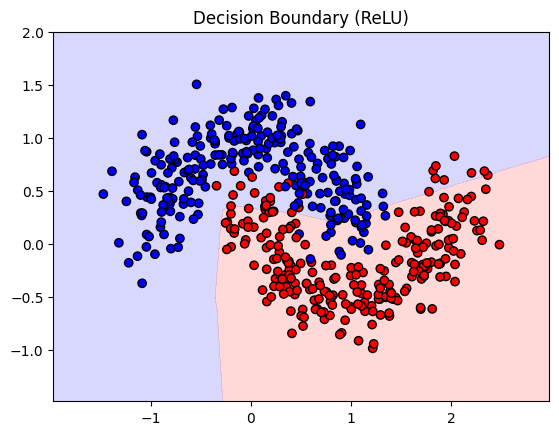

In [ ]:
##part2 relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
np.random.seed(42)

# 1. Load Data
X, y = make_moons(n_samples=500, noise=0.2)
y = y.reshape(500, 1)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', alpha=0.7)
plt.title("Make Moons Dataset")
plt.show()

# 2. Activation Functions: ReLU & Sigmoid
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# 3. Initialize Network (Xavier for ReLU)
input_size = 2
hidden_size1 = 8
hidden_size2 = 4
output_size = 1

def initialize_weights():
    global W1, b1, W2, b2, W3, b3
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))

    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))

    W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, output_size))

initialize_weights()

# 4. Forward Propagation (ReLU in hidden layers, sigmoid at output)
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)

    return z1, a1, z2, a2, z3, a3

# 5. Binary Cross Entropy Loss
def compute_loss(y, y_hat):
    epsilon = 1e-10
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

# 6. Backward Propagation (with ReLU derivative)
def backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate):
    global W1, b1, W2, b2, W3, b3

    m = len(y)
    dz3 = a3 - y
    dW3 = np.dot(a2.T, dz3) / m
    db3 = np.sum(dz3, axis=0, keepdims=True) / m

    dz2 = np.dot(dz3, W3.T) * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    # Update weights and biases
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# 7. Training
def train(X, y, epochs=1000, learning_rate=0.1):
    for epoch in range(epochs):
        z1, a1, z2, a2, z3, a3 = forward(X)
        loss = compute_loss(y, a3)
        backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate)

        if epoch % 100 == 0:
            preds = (a3 > 0.5).astype(int)
            acc = accuracy_score(y, preds)
            print(f"[ReLU] Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc*100:.2f}%")

    #  Final Accuracy After Training
    preds = (a3 > 0.5).astype(int)
    acc = accuracy_score(y, preds)
    print(f"\n Final Accuracy after {epochs} epochs: {acc * 100:.2f}%")


# Start training
train(X, y, epochs=1000, learning_rate=0.1)

# 8. Plot Decision Boundary
def plot_decision_boundary(X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z_input = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, _, _, Z_prob = forward(Z_input)
    Z = Z_prob > 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary (ReLU)")
    plt.show()

plot_decision_boundary(X, y)


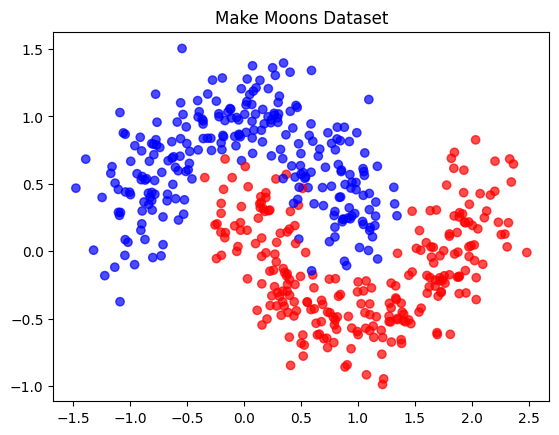

[Tanh] Epoch 0: Loss = 1.0665, Accuracy = 22.00%
[Tanh] Epoch 100: Loss = 0.3233, Accuracy = 86.00%
[Tanh] Epoch 200: Loss = 0.3029, Accuracy = 85.60%
[Tanh] Epoch 300: Loss = 0.2904, Accuracy = 86.00%
[Tanh] Epoch 400: Loss = 0.2753, Accuracy = 86.80%
[Tanh] Epoch 500: Loss = 0.2532, Accuracy = 88.20%
[Tanh] Epoch 600: Loss = 0.2179, Accuracy = 90.20%
[Tanh] Epoch 700: Loss = 0.1729, Accuracy = 93.80%
[Tanh] Epoch 800: Loss = 0.1361, Accuracy = 95.80%
[Tanh] Epoch 900: Loss = 0.1119, Accuracy = 97.20%

 Final Accuracy after 1000 epochs: 97.40%


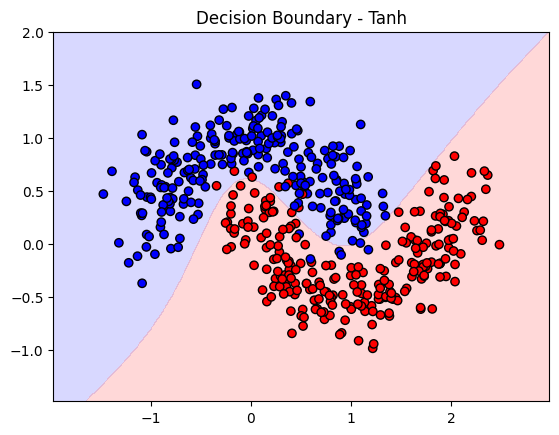

In [ ]:
##part2 tanh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
np.random.seed(42)

# 1. Load Data
X, y = make_moons(n_samples=500, noise=0.2)
y = y.reshape(500, 1)

plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', alpha=0.7)
plt.title("Make Moons Dataset")
plt.show()

# 2. Tanh Activation & Derivative
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

# 3. Initialize Network
input_size = 2
hidden_size1 = 8
hidden_size2 = 4
output_size = 1

# Xavier Initialization for Tanh
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(1. / input_size)
b1 = np.zeros((1, hidden_size1))

W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(1. / hidden_size1)
b2 = np.zeros((1, hidden_size2))

W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(1. / hidden_size2)
b3 = np.zeros((1, output_size))

# 4. Forward Propagation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = tanh(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)

    return z1, a1, z2, a2, z3, a3

# 5. Binary Cross Entropy Loss
def compute_loss(y, y_hat):
    epsilon = 1e-10
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

# 6. Backward Propagation
def backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate):
    global W1, b1, W2, b2, W3, b3

    m = len(y)
    dz3 = a3 - y
    dW3 = np.dot(a2.T, dz3) / m
    db3 = np.sum(dz3, axis=0, keepdims=True) / m

    dz2 = np.dot(dz3, W3.T) * tanh_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.dot(dz2, W2.T) * tanh_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# 7. Training Function
def train(X, y, epochs=1000, learning_rate=0.1):
    for epoch in range(epochs):
        z1, a1, z2, a2, z3, a3 = forward(X)
        loss = compute_loss(y, a3)
        backward(X, y, z1, a1, z2, a2, z3, a3, learning_rate)

        if epoch % 100 == 0:
            preds = (a3 > 0.5).astype(int)
            acc = accuracy_score(y, preds)
            print(f"[Tanh] Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc * 100:.2f}%")

    #  Final Accuracy
    preds = (a3 > 0.5).astype(int)
    acc = accuracy_score(y, preds)
    print(f"\n Final Accuracy after {epochs} epochs: {acc * 100:.2f}%")

# Start training
train(X, y, epochs=1000, learning_rate=0.1)

# 8. Plot Decision Boundary
def plot_decision_boundary(X, y, predict_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z_input = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, _, _, Z_prob = forward(Z_input)
    Z = Z_prob > 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary - Tanh")
    plt.show()

plot_decision_boundary(X, y, forward)
